In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [3]:
import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
fontpath = os.path.expanduser('~/Downloads/LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

fontsize_increase = 5
params = {
    "axes.titlesize" : 18 + fontsize_increase,
    'axes.labelsize': 18 + fontsize_increase,
    'font.size': 18 + fontsize_increase,
    'legend.fontsize': 16,
    'xtick.labelsize': 14 + fontsize_increase,
    'ytick.labelsize': 14 + fontsize_increase,
    'font.family': prop.get_name(),
    'text.usetex': False
}


mpl.rcParams.update(params)

In [4]:
color_mean = 'tab:blue'
color_median = 'tab:red'
color_bt = 'black'
lw = 3
elw = 3
alpha=0.75

## Figure 1 (Motivating Example)

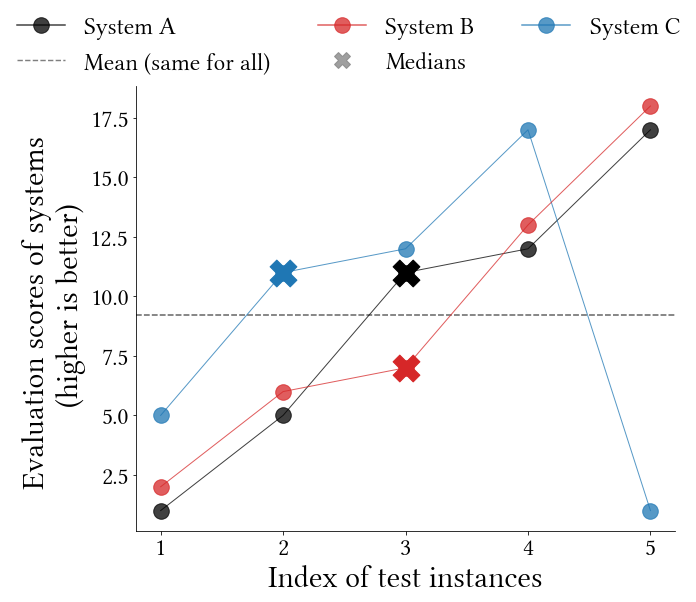

In [5]:
fontsize_increase = 13
params = {
    "axes.titlesize" : 18 + fontsize_increase,
    'axes.labelsize': 18 + fontsize_increase,
    'font.size': 18 + fontsize_increase,
    'legend.fontsize': 18 + fontsize_increase,
    'xtick.labelsize': 11 + fontsize_increase,
    'ytick.labelsize': 11 + fontsize_increase,
    'font.family': prop.get_name(),
    'text.usetex': False
}
mpl.rcParams.update(params)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

s_mul=1.2
x = [1, 2, 3, 4, 5]
y_a = [1, 5, 11, 12, 17]
y_b = [5, 11, 12, 17, 1]
y_c = [2, 6, 7, 13, 18]

lw = 1
elw = 3

ax.errorbar(x, y_a, [0]*len(x), elinewidth=elw, linewidth=lw, marker='o', ms=s_mul*13, alpha=0.75, color=color_bt)
ax.errorbar(x, y_b, [0]*len(x), elinewidth=elw, linewidth=lw, fmt='-o', ms=s_mul*13, alpha=0.75, color=color_mean)
ax.errorbar(x, y_c, [0]*len(x), elinewidth=elw, linewidth=lw, fmt='-o', ms=s_mul*13, alpha=0.75, color=color_median)

ax.axhline(np.mean(y_a), alpha=0.75, linestyle='--', color='tab:grey')
ax.axhline(np.mean(y_b), alpha=0.75, linestyle='--', color='tab:grey')
ax.axhline(np.mean(y_c), alpha=0.75, linestyle='--', color='tab:grey')

ax.scatter(3, y_a[2], s=1.5*s_mul*400, color = color_bt, marker = 'X') #facecolors='none', edgecolors=color_bt) 
ax.scatter(2, y_b[1], s=1.5*s_mul*400, color = color_mean, marker = 'X') #facecolors='none', edgecolors=color_bt) 
ax.scatter(3, y_c[2], s=1.5*s_mul*400, color = color_median, marker = 'X') #facecolors='none', edgecolors=color_bt) 

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

legend_elem = [Line2D([], [], marker='o', ms=s_mul*13, alpha=0.75, c=color_bt, label='System A'),
               Line2D([], [], linewidth=s_mul*s_mul*lw, linestyle='--',  c='tab:grey', label='Mean (same for all)'),
               Line2D([], [], marker='o', ms=s_mul*13, alpha=0.75, c=color_median, label='System B'),
               Line2D([], [], linewidth=0, marker='X', ms=s_mul*13, alpha=0.75, c='tab:grey', label='Medians'),
               Line2D([], [], marker='o', ms=s_mul*13, alpha=0.75, c=color_mean, label='System C'),
              ]

fig.legend(handles=legend_elem, ncol=3, loc='upper center', frameon=False, fontsize=24, bbox_to_anchor=(0.5, 1.1))
ax.set_xlabel('Index of test instances')
ax.set_ylabel('Evaluation scores of systems \n (higher is better)')
fig.tight_layout()
# fig.savefig("figure_1.pdf", bbox_inches="tight")

## Figure 2 (Geometrical Criterion)

In [6]:
# Generate more samples following the structure given by list_data (see Appendix)
def extend_sample(list_data, scale=0.05, sampling=50):
    X_best = [float(x) for x in list_data['X_best']]
    X_worst = [float(y) for y in list_data['X_worst']]

    samples_best, samples_worst = [], []
    for i, (x, y) in enumerate(zip(X_best, X_worst)):
        samples_best.extend(stats.norm.rvs(loc=x, scale=scale, size=sampling))
        samples_worst.extend(stats.norm.rvs(loc=y, scale=scale, size=sampling))

    return samples_best, samples_worst

In [10]:
def plot_paired_graphs(data, save_path=None, shade=True, dots=False, extended_lines=True, legend=True):    
    decision = (np.median(data['X_best'] - data['X_worst']) > 0)
    X_best, X_worst = extend_sample(data, scale=3)
    g = sns.JointGrid()
    sns.kdeplot(x=X_worst, y=X_best, kind="kde", alpha=0.5, ax=g.ax_joint)

    sns.distplot(X_best,  color='tab:blue',  ax=g.ax_marg_y, vertical=True, 
             kde_kws={"alpha": 0.2, "bw_adjust": 1.5, "fill": True},
            hist_kws={"alpha": 0.})
    sns.distplot(X_worst,  color='tab:green', ax=g.ax_marg_x,
             kde_kws={"alpha": 0.2, "bw_adjust": 1.5, "fill": True},
            hist_kws={"alpha": 0.})

    g.ax_joint.set_xlim(10, 60)
    g.ax_joint.set_ylim(10, 60)

    ## Graphical criterion demarcation
    line_x = range(-25, 110)
    g.ax_joint.plot(line_x, line_x, linestyle='dotted', linewidth=3, alpha=0.7, color='black')
    
    ## Plot dots
    if dots:
        y = data['X_best']
        x = data['X_worst']
        g.ax_joint.scatter(x, y, marker='x', color='black', s=100)
        
    ## Shade the upper-left triangle
    if shade:
#         color_shade = '#fcba03'
        color_shade = 'tab:gray'
        if decision:
            g.ax_joint.fill_between(line_x, line_x, [60]*len(line_x), color=color_shade, alpha=0.2)
        else:
            g.ax_joint.fill_between(line_x, [10]*len(line_x), line_x, color=color_shade, alpha=0.2)
    
    ## Draw Means 
    if extended_lines:
        mean_linestyle = '-'
        mean_best = np.mean(X_best)
        mean_worst = np.mean(X_worst)

        g.ax_joint.axhline(mean_best, linestyle=mean_linestyle, linewidth=2, color='tab:blue')
        g.ax_joint.axvline(mean_worst, linestyle=mean_linestyle, linewidth=2, color='tab:green')

        g.ax_marg_y.axhline(mean_best, linestyle=mean_linestyle, linewidth=2, color='tab:blue')
        g.ax_marg_x.axvline(mean_worst, linestyle=mean_linestyle, linewidth=2, color='tab:green')

    ## Draw Medians 
    if extended_lines:
        median_linestyle = 'dashed'

        median_best = np.median(X_best)
        median_worst = np.median(X_worst)

        g.ax_joint.axhline(median_best, linestyle=median_linestyle, linewidth=2, color='tab:blue')
        g.ax_joint.axvline(median_worst, linestyle=median_linestyle, linewidth=2, color='tab:green')

        g.ax_marg_y.axhline(median_best, linestyle=median_linestyle, linewidth=2, color='tab:blue')
        g.ax_marg_x.axvline(median_worst, linestyle=median_linestyle, linewidth=2, color='tab:green')

    ## Legend
    g.ax_joint.set_xlabel('Scores of $A$', color='tab:green')
    g.ax_joint.set_ylabel('Scores of $B$', color='tab:blue')
    if legend:

    
        legend_elem = [ 
#                 mpatches.Patch(facecolor="tab:blue", alpha=0.8, label=r'$X_A$'),
#                 mpatches.Patch(facecolor="tab:green", alpha=0.8, label=r'$X_B$'),
    
                Line2D([0], [0], linestyle=median_linestyle, linewidth=2, c='tab:gray', label='Median'),
#                 Line2D([0], [0], linestyle=median_linestyle, linewidth=2, c="tab:blue", label='Median X_B'),
                
                Line2D([0], [0], linestyle=mean_linestyle, linewidth=2, c='tab:gray', label='Mean'),
#                 Line2D([0], [0], linestyle=mean_linestyle, linewidth=2, c="tab:blue", label='Mean X_B'),
               
                Line2D([0], [0], linestyle='dotted', linewidth=3, c="black", label='$X_A=X_B$'),      
#                 mpatches.Patch(facecolor="tab:green", alpha=0., label=prob_text),
              ]

        g.fig.legend(handles=legend_elem, ncol=1, loc='upper center', frameon=False,  bbox_to_anchor=(0.26, .82))
        
    # g.tight_layout(pad=1.1)
#     if save_path is not None:
#         g.fig.savefig(save_path, bbox_inches="tight")

In [8]:
# This is the procedure described in Appendix, here we have 3 different types: 2 out of 3 where the first system is the best
# and one 'outlier' type of instance where the ranking of system is reversed.
initial_data = {
    "X_best": [23, 50, 40],
    "X_worst": [28, 45, 30]
}

def get_all_permutations(data):
    all_perms = []
    X_a = np.array(data['X_best'])
    for perm in list(itertools.permutations(data['X_worst'])):
        X_b = np.array(perm)
        data_perm = {'X_best': X_a, 'X_worst': X_b}
#         decision = np.median(X_a - X_b)
#         X_best = (X_a if decision > 0 else X_b)
#         X_worst = (X_b if decision > 0 else X_a)
#         data_perm = {'X_best': X_best, 'X_worst': X_worst}
        all_perms.append(data_perm)
    return all_perms

In [9]:
all_perms = get_all_permutations(initial_data)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simi

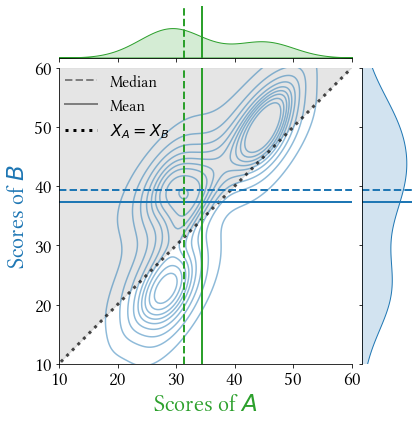

In [45]:
permut = 0
plot_paired_graphs(all_perms[permut], save_path='pairs_perm_0_gr.pdf')

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simi

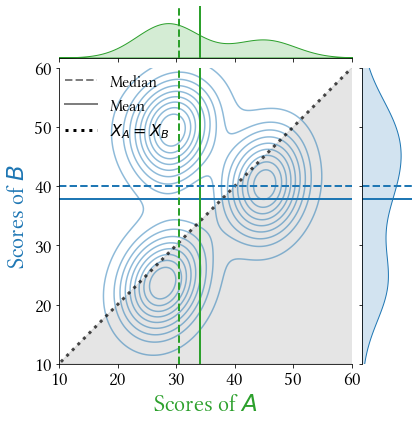

In [46]:
permut = 1
plot_paired_graphs(all_perms[permut], save_path='pairs_perm_1_gr.pdf')

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simi

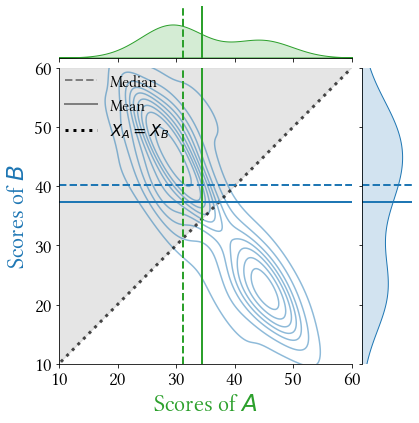

In [43]:
permut = 2
plot_paired_graphs(all_perms[permut])

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simi

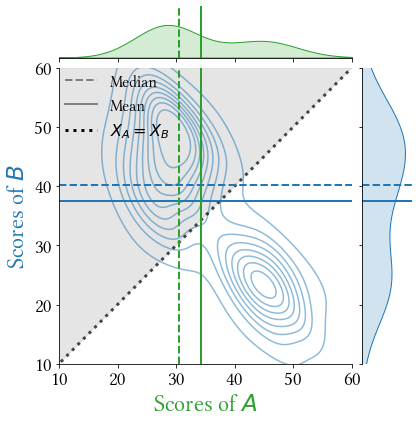

In [47]:
permut = 3
plot_paired_graphs(all_perms[permut], save_path='pairs_perm_3_gr.pdf')

## Figure 3 (Simulations)

In [12]:
from simulations import run_simulations, obtain_x_y_yerr
n_regular_list = [1, 3, 5, 10]
percentage_reverse = [0.]
n_systems_list = [2, 3, 5, 10, 25, 50]
percent_outliers_list = [0., 0.01, 0.025]#, 0.05, 0.075]
n_samples_list = [10, 30, 100, 200]
res_df = run_simulations(n_regular_list, percentage_reverse, percent_outliers_list, 
                         n_systems_list, n_samples_list, method={'name':'BT'})

In [13]:
def match_nn(l):
    idx = np.argmin([abs(l - k) for k in n_samples_list])
    return n_samples_list[idx]

res_df['n_samples'] = res_df['n_samples'].apply(match_nn)

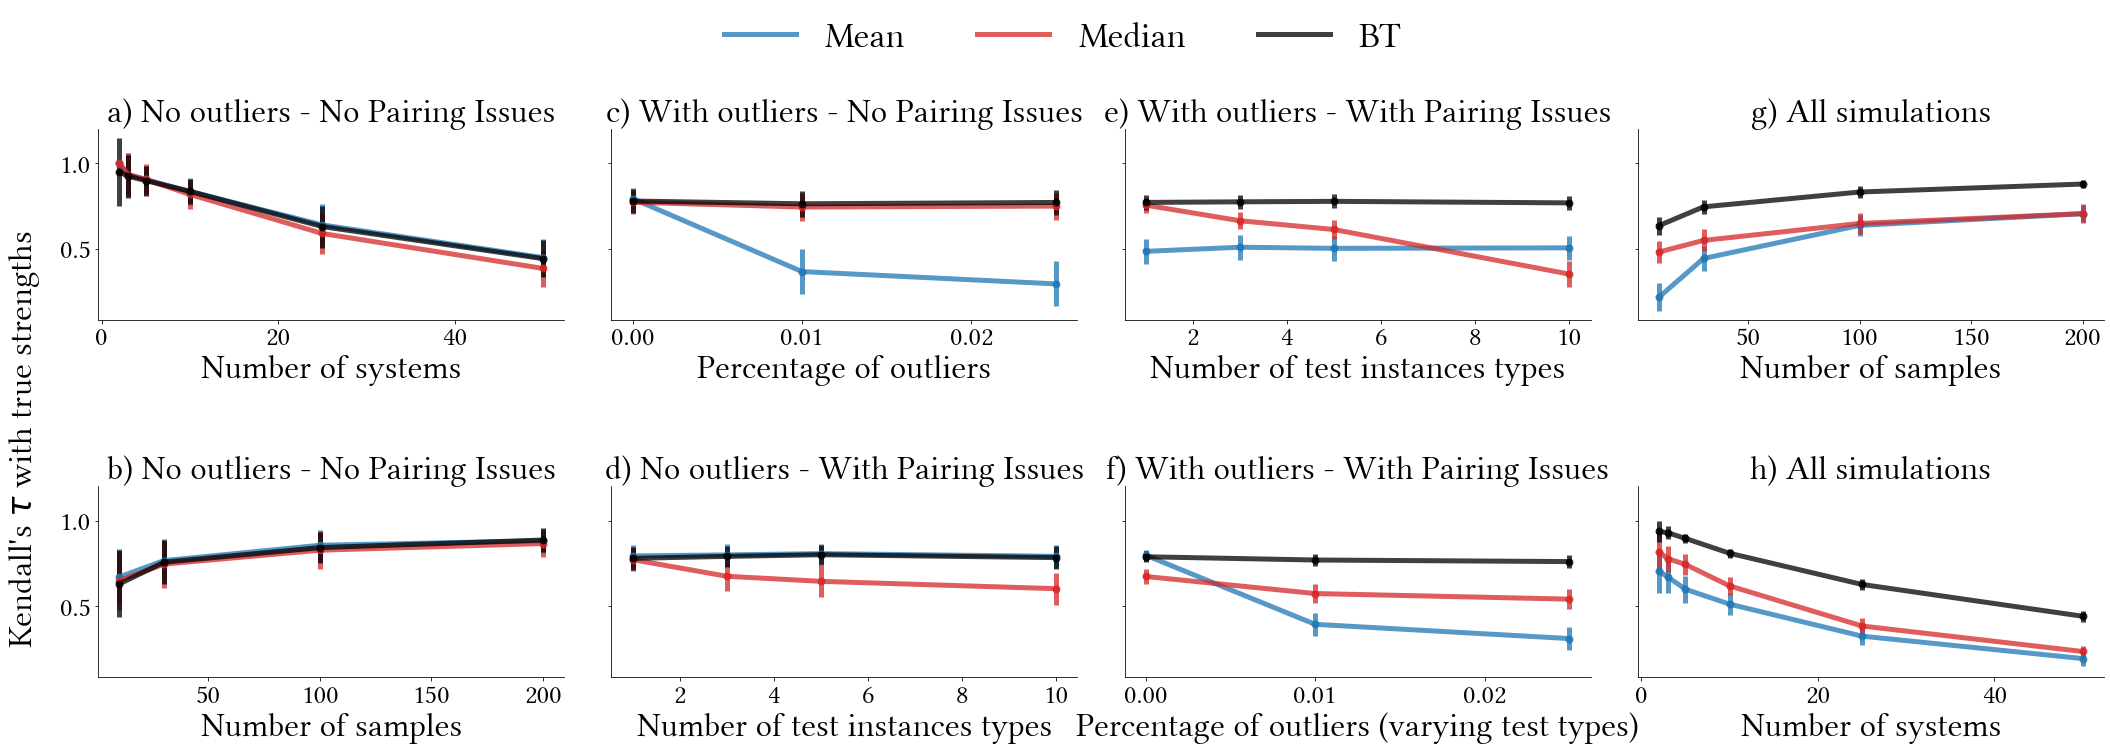

In [14]:
fontsize_increase = 16
params = {
    "axes.titlesize" : 18 + fontsize_increase,
    'axes.labelsize': 18 + fontsize_increase,
    'font.size': 18 + fontsize_increase,
    'legend.fontsize': 20 + fontsize_increase,
    'xtick.labelsize': 11 + fontsize_increase,
    'ytick.labelsize': 11 + fontsize_increase,
    'font.family': prop.get_name(),
    'text.usetex': False
}

name_pairing_issue = 'Pairing Issues'

mpl.rcParams.update(params)

lw=5
elw=5

fig, axes = plt.subplots(2, 4, figsize=(30, 10), sharey=True)

## Easy cases
easy_cases = res_df[(res_df['n_outliers'] == 0.) & (res_df['n_reverse'] == 0.)]
easy_cases = easy_cases[easy_cases['n_regular'] == 1]

ax = axes[0][0]
x_axis = 'n_systems'
x, y, yerr = obtain_x_y_yerr(easy_cases, x_axis, 'Mean')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_mean)
x, y, yerr = obtain_x_y_yerr(easy_cases, x_axis, 'Median')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_median)
x, y, yerr = obtain_x_y_yerr(easy_cases, x_axis, 'BT')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_bt)
ax.set_xlabel('Number of systems')
# ax.set_ylabel(r'Kendall\'s $\tau$ with true strengths')
ax.set_title('a) No outliers - No {}'.format(name_pairing_issue))

ax = axes[1][0]
x_axis = 'n_samples'
x, y, yerr = obtain_x_y_yerr(easy_cases, x_axis, 'Mean')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_mean)
x, y, yerr = obtain_x_y_yerr(easy_cases, x_axis, 'Median')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_median)
x, y, yerr = obtain_x_y_yerr(easy_cases, x_axis, 'BT')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_bt)
ax.set_xlabel('Number of samples')
ax.set_ylabel(r"Kendall's $\tau$ with true strengths")
ax.yaxis.set_label_coords(-0.12,1.25)
ax.set_title('b) No outliers - No {}'.format(name_pairing_issue))


## One problem at a time
ax = axes[0][1]
outliers_df = res_df[res_df['n_regular'] == 1]
x_axis = 'n_outliers'
x, y, yerr = obtain_x_y_yerr(outliers_df, x_axis, 'Mean')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_mean)
x, y, yerr = obtain_x_y_yerr(outliers_df, x_axis, 'Median')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_median)
x, y, yerr = obtain_x_y_yerr(outliers_df, x_axis, 'BT')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_bt)
ax.set_xlabel('Percentage of outliers')
ax.set_title('c) With outliers - No {}'.format(name_pairing_issue))

ax = axes[1][1]
regular_df = res_df[res_df['n_outliers'] == 0.]
x_axis = 'n_regular'
x, y, yerr = obtain_x_y_yerr(regular_df, x_axis, 'Mean')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_mean)
x, y, yerr = obtain_x_y_yerr(regular_df, x_axis, 'Median')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_median)
x, y, yerr = obtain_x_y_yerr(regular_df, x_axis, 'BT')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_bt)
ax.set_xlabel('Number of test instances types')
ax.set_title('d) No outliers - With {}'.format(name_pairing_issue))

## Both problems together
ax = axes[0][2]
# regular_df = res_df[res_df['n_outliers'] == 0.]
x_axis = 'n_regular'
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'Mean')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_mean)
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'Median')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_median)
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'BT')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_bt)
ax.set_xlabel('Number of test instances types')
ax.set_title('e) With outliers - With {}'.format(name_pairing_issue))

ax = axes[1][2]
# outliers_df = res_df[res_df['n_regular'] == 1]
x_axis = 'n_outliers'
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'Mean')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_mean)
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'Median')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_median)
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'BT')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_bt)
ax.set_xlabel('Percentage of outliers (varying test types)')
ax.set_title('f) With outliers - With {}'.format(name_pairing_issue))

## All
ax = axes[0][3]
x_axis = 'n_samples'
# n_samples_df = res_df[res_df['n_samples'] != 10]
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'Mean')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_mean)
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'Median')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_median)
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'BT')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_bt)
ax.set_xlabel('Number of samples')
ax.set_title('g) All simulations')

ax = axes[1][3]
x_axis = 'n_systems'
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'Mean')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_mean)
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'Median')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_median)
x, y, yerr = obtain_x_y_yerr(res_df, x_axis, 'BT')
ax.errorbar(x, y, yerr, elinewidth=elw, linewidth=lw, fmt='-o', ms=7, alpha=0.75, color=color_bt)
ax.set_xlabel('Number of systems')
ax.set_title('h) All simulations')


for ax in axes.reshape(-1):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

fig.subplots_adjust(hspace=+.15)

legend_elem = [Line2D([0], [0], linestyle='-', linewidth=lw, alpha=0.75, c=color_mean, label='Mean'),
                   Line2D([0], [0], linestyle='-', linewidth=lw, alpha=0.75, c=color_median, label='Median'),
                   Line2D([0], [0], linestyle='-', linewidth=lw, alpha=0.75, c=color_bt, label='BT')]

fig.legend(handles=legend_elem, ncol=3, loc='upper center', frameon=False, bbox_to_anchor=(0.5, 1.1))
    
fig.tight_layout()
# fig.savefig("images-output/simulations.pdf", bbox_inches="tight")